<a href="https://colab.research.google.com/github/Angiey1/python-course/blob/tarea3-semana4-5/Tarea3_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarea 3

**Angie Yépez**

**Librerías**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#https://raw.githubusercontent.com/cienciadedatos/datos-de-miercoles/master/datos/2019/2019-04-10/partidos.txt

**Obtención de datos**

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/cienciadedatos/datos-de-miercoles/master/datos/2019/2019-04-10/partidos.txt',delimiter='\t')

In [4]:
data.head()

,anio,anfitrion,estadio,ciudad,partido_orden,fecha,equipo_1,equipo_2,equipo_1_final,equipo_2_final
0,1930,Uruguay,Estadio Pocitos,Montevideo,(1),1930-07-13,Francia,Mexico,4,1
1,1930,Uruguay,Estadio Parque Central,Montevideo,(2),1930-07-13,Estados Unidos,Bélgica,3,0
2,1930,Uruguay,Estadio Parque Central,Montevideo,(3),1930-07-14,Yugoslavia,Brasil,2,1
3,1930,Uruguay,Estadio Pocitos,Montevideo,(4),1930-07-14,Rumania,Perú,3,1
4,1930,Uruguay,Estadio Parque Central,Montevideo,(5),1930-07-15,Argentina,Francia,1,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   anio            900 non-null    int64 
 1   anfitrion       900 non-null    object
 2   estadio         900 non-null    object
 3   ciudad          899 non-null    object
 4   partido_orden   900 non-null    object
 5   fecha           900 non-null    object
 6   equipo_1        900 non-null    object
 7   equipo_2        900 non-null    object
 8   equipo_1_final  900 non-null    int64 
 9   equipo_2_final  900 non-null    int64 
dtypes: int64(3), object(7)
memory usage: 70.4+ KB


In [24]:
data_alemania_francia = data[(data.equipo_1 == 'Alemania')|(data.equipo_1 == 'Francia')|(data.equipo_2 == 'Alemania')|(data.equipo_2 == 'Francia')]
data_alemania_francia.head()

,anio,anfitrion,estadio,ciudad,partido_orden,fecha,equipo_1,equipo_2,equipo_1_final,equipo_2_final
0,1930,Uruguay,Estadio Pocitos,Montevideo,(1),1930-07-13,Francia,Mexico,4,1
4,1930,Uruguay,Estadio Parque Central,Montevideo,(5),1930-07-15,Argentina,Francia,1,0
9,1930,Uruguay,Estadio Centenario,Montevideo,(10),1930-07-19,Chile,Francia,1,0
19,1934,Italia,Stadio Benito Mussolini,Turin,(2),1934-05-27,Austria,Francia,1,1
20,1934,Italia,Stadio Giovanni Berta,Florence,(3),1934-05-27,Alemania,Bélgica,1,2


In [25]:
data_alemania_francia.iloc[1].equipo_1

'Argentina'

In [26]:
data_alemania_francia.shape[0]

112

Verifico si hay partidos en los que hayan jugado ambos países

In [19]:
data_alemania_francia[((data_alemania_francia.equipo_1 == 'Alemania')&(data_alemania_francia.equipo_2 == 'Francia'))|((data_alemania_francia.equipo_1 == 'Alemania')&(data_alemania_francia.equipo_2 == 'Francia'))]

,anio,anfitrion,estadio,ciudad,partido_orden,fecha,equipo_1,equipo_2,equipo_1_final,equipo_2_final


No se muestran resultados, por lo que no considero esos casos excepcionales

**Determino si el partido fue ganado, empatado o perdido en referencia a los dos países**

In [20]:
resultado = []
for i in range(0,data_alemania_francia.shape[0]):
  if ((data_alemania_francia.iloc[i].equipo_1 == 'Alemania') | (data_alemania_francia.iloc[i].equipo_1 == 'Francia')):
    if data_alemania_francia.iloc[i].equipo_1_final > data_alemania_francia.iloc[i].equipo_2_final:
      resultado.append(1)
    elif data_alemania_francia.iloc[i].equipo_1_final < data_alemania_francia.iloc[i].equipo_2_final:
      resultado.append(0)
    else:
      resultado.append(-1)
  else:
     if data_alemania_francia.iloc[i].equipo_1_final < data_alemania_francia.iloc[i].equipo_2_final:
      resultado.append(1)
     elif data_alemania_francia.iloc[i].equipo_1_final > data_alemania_francia.iloc[i].equipo_2_final:
      resultado.append(0)
     else:
      resultado.append(-1)
print(resultado)

[1, 0, 0, -1, 0, -1, 0, 1, -1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, -1, 0, 0, 0, 0, 1, 0, 1, -1, 1, 1, 0, 0, 1, -1, 1, 1, 1, 0, 1, 1, -1, 1, 1, 0, 1, 1, 1, -1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, -1, -1, 0, 1, 1, 1, 1, 0, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, -1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, -1, -1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, -1, 0, 1, 1, 1, 1]


In [ ]:
data_alemania_francia['comparacion_fr'] = data_alemania_francia.apply(lambda x: (x['media_global']-x['felicidad_fr']),axis=1)

In [28]:
type(resultado)

list

In [23]:
data_alemania_francia.loc[:,'resultado_partido'] = resultado
data_alemania_francia.head()

<ipython-input-23-cb097c6756d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_alemania_francia.loc[:,'resultado_partido'] = resultado


,anio,anfitrion,estadio,ciudad,partido_orden,fecha,equipo_1,equipo_2,equipo_1_final,equipo_2_final,resultado_partido
0,1930,Uruguay,Estadio Pocitos,Montevideo,(1),1930-07-13,Francia,Mexico,4,1,1
4,1930,Uruguay,Estadio Parque Central,Montevideo,(5),1930-07-15,Argentina,Francia,1,0,0
9,1930,Uruguay,Estadio Centenario,Montevideo,(10),1930-07-19,Chile,Francia,1,0,0
19,1934,Italia,Stadio Benito Mussolini,Turin,(2),1934-05-27,Austria,Francia,1,1,-1
20,1934,Italia,Stadio Giovanni Berta,Florence,(3),1934-05-27,Alemania,Bélgica,1,2,0


In [30]:
es_francia= (data_alemania_francia.equipo_1 == 'Francia')|(data_alemania_francia.equipo_2 == 'Francia')
es_alemania = (data_alemania_francia.equipo_1 == 'Alemania')|(data_alemania_francia.equipo_2 == 'Alemania')

In [ ]:
data_alemania_francia['pais'] = data_alemania_francia.apply(lambda x: 'Francia' if (x['equipo_1'] == 'Francia' or x['equipo_2'] == 'Francia') else 'Alemania',axis=1)

In [90]:
data_alemania_francia.head()

,anio,anfitrion,estadio,ciudad,partido_orden,fecha,equipo_1,equipo_2,equipo_1_final,equipo_2_final,resultado_partido,pais
0,1930,Uruguay,Estadio Pocitos,Montevideo,(1),1930-07-13,Francia,Mexico,4,1,1,Francia
4,1930,Uruguay,Estadio Parque Central,Montevideo,(5),1930-07-15,Argentina,Francia,1,0,0,Francia
9,1930,Uruguay,Estadio Centenario,Montevideo,(10),1930-07-19,Chile,Francia,1,0,0,Francia
19,1934,Italia,Stadio Benito Mussolini,Turin,(2),1934-05-27,Austria,Francia,1,1,-1,Francia
20,1934,Italia,Stadio Giovanni Berta,Florence,(3),1934-05-27,Alemania,Bélgica,1,2,0,Alemania


In [92]:
data_alemania_francia[['anio','pais','resultado_partido']][data_alemania_francia.resultado_partido == 1].groupby(['anio','pais'])['resultado_partido'].sum()

anio  pais    
1930  Francia     1
1934  Alemania    1
1938  Francia     1
1954  Francia     1
1958  Francia     4
1978  Francia     1
1982  Francia     3
1986  Francia     5
1994  Alemania    3
1998  Alemania    3
      Francia     7
2002  Alemania    5
2006  Alemania    6
      Francia     5
2010  Alemania    5
2014  Alemania    5
      Francia     3
2018  Alemania    1
      Francia     6
Name: resultado_partido, dtype: int64

In [98]:
resultados_gana_fr_al = pd.DataFrame(data_alemania_francia[['anio','pais','resultado_partido']][data_alemania_francia.resultado_partido == 1])
resultados_gana_fr_al.head()

,anio,pais,resultado_partido
0,1930,Francia,1
33,1934,Alemania,1
37,1938,Francia,1
84,1954,Francia,1
103,1958,Francia,1


In [107]:
resultados_gana_fr_al = resultados_gana_fr_al.groupby(['anio','pais'])['resultado_partido'].sum().reset_index()
resultados_gana_fr_al.head()

,anio,pais,resultado_partido
0,1930,Francia,1
1,1934,Alemania,1
2,1938,Francia,1
3,1954,Francia,1
4,1958,Francia,4


In [117]:
resultados_gana_fr_al.set_index('pais',inplace=True)

In [118]:
resultados_gana_fr_al.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, Francia to Francia
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   anio               19 non-null     int64
 1   resultado_partido  19 non-null     int64
dtypes: int64(2)
memory usage: 456.0+ bytes


**Gráficos**

Text(0.5, 1.0, 'Partidos ganados por Alemania')

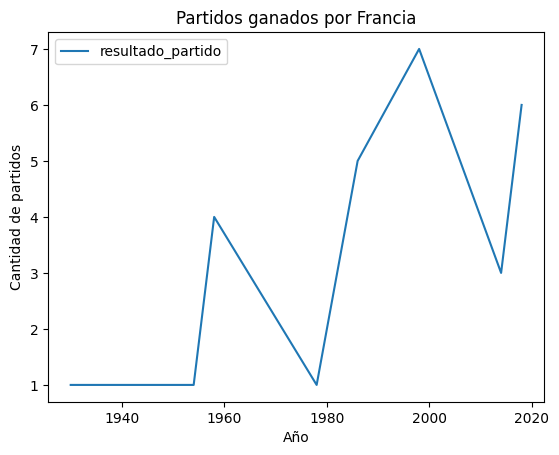

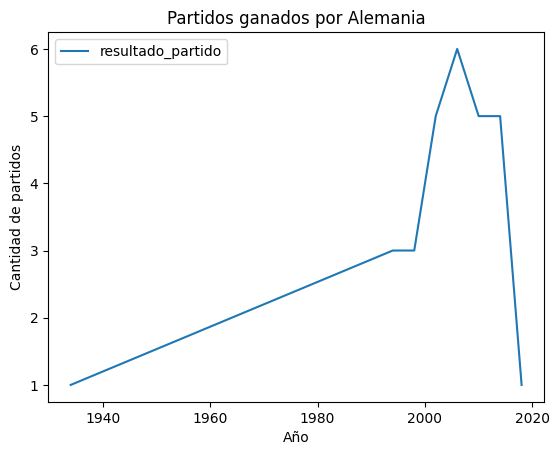

In [125]:
resultados_gana_fr_al.loc['Francia'].plot(x='anio',y='resultado_partido')
plt.xlabel('Año')
plt.ylabel('Cantidad de partidos')
plt.title('Partidos ganados por Francia')
resultados_gana_fr_al.loc['Alemania'].plot(x='anio',y='resultado_partido')
plt.xlabel('Año')
plt.ylabel('Cantidad de partidos')
plt.title('Partidos ganados por Alemania')

Text(0.5, 1.0, 'Partidos ganados en mundiales de Fútbol')

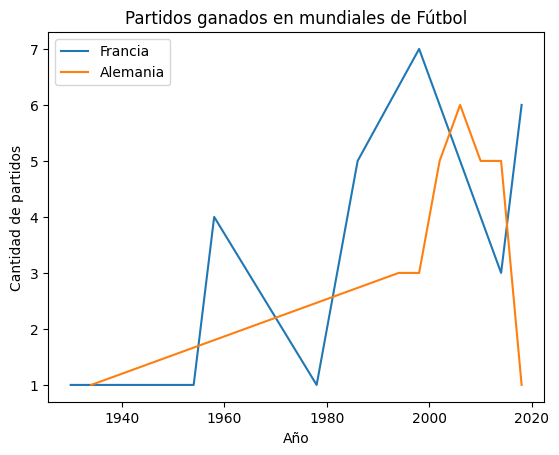

In [134]:
fig = plt.figure()
eje = fig.add_subplot(1,1,1)
resultados_gana_fr_al.loc['Francia'].plot(x='anio',y='resultado_partido',ax=eje)
resultados_gana_fr_al.loc['Alemania'].plot(x='anio',y='resultado_partido',ax=eje)
plt.legend(['Francia','Alemania'])
plt.xlabel('Año')
plt.ylabel('Cantidad de partidos')
plt.title('Partidos ganados en mundiales de Fútbol')

Text(0, 0.5, 'Cantidad de partidos')

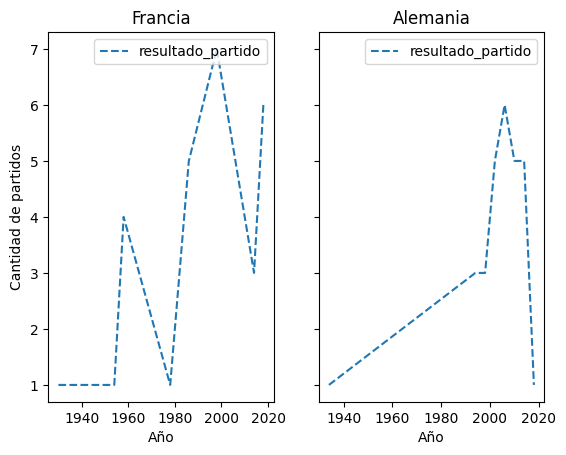

In [136]:
fig = plt.figure()
eje = fig.add_subplot(1,2,1)
eje2 = fig.add_subplot(1,2,2,sharey=eje)
resultados_gana_fr_al.loc['Francia'].plot(x='anio',y='resultado_partido',ax=eje,ls = '--')
resultados_gana_fr_al.loc['Alemania'].plot(x='anio',y='resultado_partido',ax=eje2,ls = '--')
eje.set_title('Francia')
eje2.set_title('Alemania')
eje.set_xlabel('Año')
eje2.set_xlabel('Año')
eje.set_ylabel('Cantidad de partidos')